In [1]:
import matplotlib.pyplot as plt
import copy
import numpy as np

In [2]:
def do_add(ll, ii_1, ii_2, ii_3, imme_bool):
    if not imme_bool:
        try:
            ll[ii_3] = ii_1 + ii_2
        except:
            print((ii_1, ii_2, ii_3))
            print(ll)
    return 4
    
def do_mul(ll, ii_1, ii_2, ii_3, imme_bool):
    if not imme_bool:
        ll[ii_3] = ii_1 * ii_2
    return 4

def do_store(ll, ii_1, inp_val, imme_bool):
    if not imme_bool:
        ll[ii_1] = inp_val
    return 2

def do_output(ii_1, verbose):
    if verbose:
        print(ii_1)
    return 2

def jump_if_true(ii_1, ii_2, cur):
    if ii_1:
        return ii_2 
    return cur + 3

def jump_if_false(ii_1, ii_2, cur):
    if not ii_1:
        return ii_2 
    return cur + 3

def do_less_than(ll, ii_1, ii_2, ii_3):
    if ii_1 < ii_2:
        ll[ii_3] = 1
    else:
        ll[ii_3] = 0
    return 4

def do_equals(ll, ii_1, ii_2, ii_3):
    if ii_1 == ii_2:
        ll[ii_3] = 1
    else:
        ll[ii_3] = 0
    return 4

def do_adjust_relative_base(ii_1, rel_index, cur):
    return cur + 2, rel_index + ii_1

def set_up_single(jj, ll, cur, rel_index, pos_code=False):   
    # 0: position mode, use value as pointer
    # 1: immediate mode, use value as int
    # 2: relative mode, use value as pointer with offset
    param = str(ll[cur])[:-2]
    if len(param) >=jj and int(param[len(param)-jj]) == 1: # immediate
        return ll[cur+jj], True
    elif len(param) >=jj and int(param[len(param)-jj]) == 2: # relative
        offset = rel_index
    else:
        offset = 0
    if pos_code:
        assert(cur+jj >= 0)
        return ll[cur+jj]+offset, False
    else:
        assert(cur+jj >= 0)
        assert(ll[cur+jj]+offset >= 0)
        return ll[ll[cur+jj]+offset], False

def set_up_inputs_len_3(ll, cur, rel_index):
    ii_3, imme_bool = set_up_single(3, ll, cur, rel_index, pos_code=True)
    ii_2, _ = set_up_single(2, ll, cur, rel_index)
    ii_1, _ = set_up_single(1, ll, cur, rel_index)
    return ii_1, ii_2, ii_3, imme_bool

def get_inp_val(inp_index, inp_val):
    cur_inp_val = inp_val[inp_index]
    return cur_inp_val, inp_index + 1
    
    
def run_computer(ll, inp_val, verbose=True, out_val=[], 
                 cur=0, inp_index=0, rel_index=0):
    # Provide all inputs so computer can be restarted from previous settings
    
    # Extra memory needs to be provided by appending ll before first starting the computer
    
    while ll[cur] % 100 != 99:
        
        if ll[cur] % 100 == 1:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_add(ll, ii_1, ii_2, ii_3, imme_bool)
        elif ll[cur] % 100 == 2:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_mul(ll, ii_1, ii_2, ii_3, imme_bool)
        elif ll[cur] % 100 == 3:
            if len(inp_val) <= inp_index: # Wait till other machines have run so input is available
                return [cur, inp_index, rel_index], False
            ii_1, imme_bool = set_up_single(1, ll, cur, rel_index, pos_code=True)
            cur_inp_val, inp_index = get_inp_val(inp_index, inp_val)
            cur = cur + do_store(ll, ii_1, cur_inp_val, imme_bool)
        elif ll[cur] % 100 == 4:
            ii_1, imme_bool = set_up_single(1, ll, cur, rel_index, pos_code=False)
            last_output = ii_1
            out_val.append(last_output)
            cur = cur + do_output(ii_1, verbose)
        elif ll[cur] % 100 == 5:
            ii_1, _ = set_up_single(1, ll, cur, rel_index)
            ii_2, _ = set_up_single(2, ll, cur, rel_index)
            cur = jump_if_true(ii_1, ii_2, cur)
        elif ll[cur] % 100 == 6:
            ii_1, _ = set_up_single(1, ll, cur, rel_index)
            ii_2, _ = set_up_single(2, ll, cur, rel_index)
            cur = jump_if_false(ii_1, ii_2, cur)
        elif ll[cur] % 100 == 7:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_less_than(ll, ii_1, ii_2, ii_3)
        elif ll[cur] % 100 == 8:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_equals(ll, ii_1, ii_2, ii_3)
        elif ll[cur] % 100 == 9:
            ii_1, _ = set_up_single(1, ll, cur, rel_index)
            cur, rel_index = do_adjust_relative_base(ii_1, rel_index, cur)
        else:
            print(ll)
            raise ValueError
#     return ll
    return last_output, True

In [3]:
def update_position(x_cor, y_cor, dir_code):
    if dir_code == 1:
        y_cor = y_cor + 1
    elif dir_code == 2:
        y_cor = y_cor - 1
    elif dir_code == 3:
        x_cor = x_cor - 1
    elif dir_code == 4:
        x_cor = x_cor + 1
    else:
        raise ValueError
    return x_cor, y_cor

In [4]:
### New approach
# Explore area with depth first search, remembering first sequence that 
#    got the robot there
# At each point, determine nature of all points around it not yet explored,
#    i.e. move NS, EW, WE, SN, remember all points that need exploring, and 
#    determine one to explore further

In [5]:
def get_reverse(aa):
    if aa == 1:
        return 2
    if aa == 2:
        return 1
    if aa == 3:
        return 4
    if aa == 4:
        return 3

In [6]:
def get_directions(B, A):
    new_B = []
    ii = 0
    while ii < min(len(B), len(A)):
        if A[ii] != B[ii]:
            break
        ii = ii + 1
        
    for jj in range(len(A)-1, ii-1, -1):
        if A[jj] == 1:
            new_B.append((2, False))
        elif A[jj] == 2:
            new_B.append((1, False))
        elif A[jj] == 3:
            new_B.append((4, False))
        elif A[jj] == 4:
            new_B.append((3, False))
        
    
    for jj in range(ii, len(B)):
        new_B.append((B[jj], False))
    new_B.reverse()
    return new_B
# new_B = get_directions(B, A)
# # new_B.reverse()
# print(new_B)

In [7]:
Nx = 50
Ny = 50
M = 100

grid = np.zeros((Ny,Nx))
explored = np.zeros((Ny,Nx))

x_cor = Nx//2
y_cor = Ny//2

grid[y_cor, x_cor] = 1
# print(np.shape(grid))
print((x_cor, y_cor))

search_list = [(x_cor, y_cor)]
queue = []
return_dict = {(x_cor, y_cor): []}


inp_program = [3,1033,1008,1033,1,1032,1005,1032,31,1008,1033,2,1032,1005,1032,58,1008,1033,3,1032,1005,1032,81,1008,1033,4,1032,1005,1032,104,99,101,0,1034,1039,1001,1036,0,1041,1001,1035,-1,1040,1008,1038,0,1043,102,-1,1043,1032,1,1037,1032,1042,1106,0,124,101,0,1034,1039,101,0,1036,1041,1001,1035,1,1040,1008,1038,0,1043,1,1037,1038,1042,1105,1,124,1001,1034,-1,1039,1008,1036,0,1041,1002,1035,1,1040,1001,1038,0,1043,1002,1037,1,1042,1106,0,124,1001,1034,1,1039,1008,1036,0,1041,102,1,1035,1040,1001,1038,0,1043,102,1,1037,1042,1006,1039,217,1006,1040,217,1008,1039,40,1032,1005,1032,217,1008,1040,40,1032,1005,1032,217,1008,1039,39,1032,1006,1032,165,1008,1040,39,1032,1006,1032,165,1101,2,0,1044,1106,0,224,2,1041,1043,1032,1006,1032,179,1102,1,1,1044,1106,0,224,1,1041,1043,1032,1006,1032,217,1,1042,1043,1032,1001,1032,-1,1032,1002,1032,39,1032,1,1032,1039,1032,101,-1,1032,1032,101,252,1032,211,1007,0,59,1044,1106,0,224,1101,0,0,1044,1106,0,224,1006,1044,247,101,0,1039,1034,1001,1040,0,1035,1002,1041,1,1036,102,1,1043,1038,101,0,1042,1037,4,1044,1105,1,0,33,20,19,43,28,91,62,55,96,28,52,9,24,99,11,45,80,58,96,2,8,76,1,37,5,95,18,6,97,67,47,4,19,29,74,57,45,65,17,43,93,33,71,93,26,2,86,11,31,74,85,36,94,20,89,68,45,99,43,21,3,92,69,95,8,30,84,45,10,64,95,49,60,60,45,30,94,36,17,97,90,39,4,97,76,28,80,92,5,66,20,69,95,43,95,35,30,67,67,87,36,44,11,83,62,73,42,80,20,99,79,46,1,75,85,24,5,84,47,78,91,91,38,74,16,31,96,37,60,69,12,96,2,5,83,24,67,42,7,67,94,77,34,6,75,2,61,37,15,11,65,13,63,39,42,93,22,12,89,58,98,28,69,13,98,68,34,13,93,56,85,28,92,45,84,79,70,12,27,85,1,86,94,57,64,30,75,78,49,91,19,94,77,34,40,15,64,26,34,31,70,65,34,65,7,73,61,8,23,82,55,78,36,93,10,29,64,42,99,34,91,17,33,98,45,44,74,98,60,76,6,44,73,11,13,11,73,92,55,90,3,54,23,75,28,36,82,89,84,6,39,31,39,98,34,61,21,93,48,71,80,7,46,76,71,17,7,91,6,22,76,70,27,98,35,29,69,93,42,81,62,46,87,47,51,66,2,60,3,76,68,68,74,70,3,89,18,2,57,74,79,97,16,5,73,19,90,49,6,41,88,83,34,63,52,84,14,19,76,78,88,19,92,90,34,16,69,45,85,30,71,16,77,30,43,65,85,66,11,2,72,3,83,84,14,86,90,74,79,35,33,29,78,9,92,35,64,32,30,66,9,65,30,85,81,44,95,41,22,16,28,75,63,72,23,5,73,24,89,80,25,40,88,62,3,68,6,80,6,39,17,76,24,78,6,90,79,38,44,78,85,29,48,25,75,27,76,92,19,93,21,61,56,13,64,92,52,77,12,33,77,41,75,86,29,34,65,38,66,17,15,95,50,87,52,64,72,73,6,26,80,71,8,86,1,23,67,10,72,89,9,95,60,20,46,64,99,34,46,65,14,54,93,84,4,13,86,12,26,68,56,33,83,12,93,42,74,9,99,62,22,20,83,75,13,71,96,53,96,41,8,15,76,97,55,8,78,85,57,79,30,87,17,46,62,85,14,70,63,82,28,46,96,35,89,6,9,27,44,86,93,28,9,97,73,14,7,84,64,15,62,14,17,88,92,82,11,47,63,73,13,94,98,88,15,37,38,11,2,74,20,73,94,26,96,64,56,80,53,48,85,85,35,15,90,63,9,42,99,81,97,26,94,32,24,96,61,38,18,57,22,76,7,5,43,55,97,74,35,99,86,24,25,8,60,75,18,61,14,97,52,64,97,45,29,69,91,43,40,99,58,72,73,70,45,5,97,37,89,77,32,92,94,6,33,72,64,35,75,14,32,99,64,54,78,1,92,35,30,71,11,48,82,61,49,12,46,75,54,52,33,92,24,11,72,72,16,17,57,72,68,46,15,85,58,74,55,54,87,97,44,94,16,84,57,56,96,33,79,7,70,50,23,98,91,6,62,51,73,68,17,83,93,56,15,81,99,88,15,13,93,53,48,69,2,14,83,86,39,4,54,69,52,42,60,79,92,38,68,90,48,77,46,77,16,89,3,96,77,11,77,23,73,98,35,3,1,97,48,62,36,74,13,93,19,71,23,70,64,64,14,71,86,98,20,95,1,97,30,92,16,98,63,94,56,90,49,94,28,88,43,84,38,74,83,62,4,98,63,69,0,0,21,21,1,10,1,0,0,0,0,0,0]
inp_program = inp_program + [0]*M
inp_list = []
out_list = []

out_jj = 0
raw_out = [0, 0, 0]
# for ii in inp_queue:
for ii in range(10000):
#     print((x_cor, y_cor))
#     inp_list.append(ii)

    ### Modify inp_list providing
    if len(queue) == 0:
        try:
            next_exp = search_list.pop()
        except IndexError:
            break
#         print('Next: %s'%str(next_exp))
        (next_xx, next_yy) = next_exp
        explored[next_yy, next_xx] = True
        move_to_next = get_directions(return_dict[next_exp], return_dict[(x_cor, y_cor)])
        explore_round_next = [(1, True), (2, True), (3, True), (4, True)]
        # If we don't hit wall, want to add entry to list to go back
        queue = explore_round_next + move_to_next
#         inp_list.append(queue.pop())
        
    (next_dir, move_back) = queue.pop()
    inp_list.append(next_dir)
    
    [cur, inp_index, rel_index] = raw_out
    raw_out, _ = run_computer(inp_program, inp_list, verbose=False, out_val=out_list, 
                     cur=cur, inp_index=inp_index, rel_index=rel_index)

    while(out_jj < len(out_list)):
#         print(out_list[out_jj])
        new_x, new_y = update_position(x_cor, y_cor, inp_list[-1])
#         print((new_y, new_x))
        if out_list[out_jj] == 0:
            grid[new_y, new_x] = 3 # Wall
        elif out_list[out_jj] == 1:
            grid[new_y, new_x] = 1
            
            if (new_x, new_y) not in return_dict.keys() or \
                    len(return_dict[(x_cor, y_cor)]) + 1 < len(return_dict[(new_x, new_y)]):
                return_dict[(new_x, new_y)] = return_dict[(x_cor, y_cor)] + [next_dir]
            x_cor, y_cor = new_x, new_y
            if move_back:
                queue.append((get_reverse(next_dir), False))
            
            if not explored[y_cor, x_cor]:
                search_list.append((x_cor, y_cor))
        elif out_list[out_jj] == 2:
            grid[new_y, new_x] = 2
            
            if (new_x, new_y) not in return_dict.keys() or \
                    len(return_dict[(x_cor, y_cor)]) + 1 < len(return_dict[(new_x, new_y)]):
                return_dict[(new_x, new_y)] = return_dict[(x_cor, y_cor)] + [next_dir]

            print('FOUND!')
            print((new_x, new_y))
            x_cor, y_cor = new_x, new_y
            
            if move_back:
                queue.append((get_reverse(next_dir), False))
            
            if not explored[y_cor, x_cor]:
                search_list.append((x_cor, y_cor))
            
        else:
            raise ValueError
        out_jj = out_jj + 1

out_list    
print((y_cor, x_cor))

(25, 25)
FOUND!
(43, 7)
FOUND!
(43, 7)
FOUND!
(43, 7)
(13, 7)


In [8]:
# Part one solution
len(return_dict[(43, 7)])

300

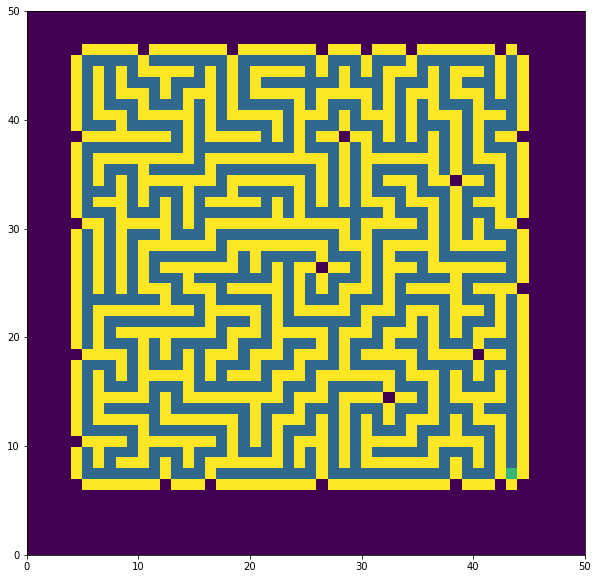

In [9]:
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid)

In [10]:
ox_grid = copy.deepcopy(grid)

step = 0
while np.sum(ox_grid == 1) > 0:
    new_grid = copy.deepcopy(ox_grid)
    for ii in range(Ny):
        for jj in range(Nx):
            if ox_grid[ii, jj] == 2:
                for (yy, xx) in [(ii+1, jj), (ii-1, jj), (ii, jj+1), (ii, jj-1)]:
                    if ox_grid[yy, xx] == 1:
                        new_grid[yy, xx] = 2
    step = step + 1
    ox_grid = new_grid
        

In [11]:
# Part two solution
print(step)

312
